# PHQ615 : Calculs 

## Calcul de la connexion affine et du tenseur de Riemann à partir de la métrique

## 2-sphère

Calculs de la connexion et du tenseur de Riemann pour la 2-sphère en coordonnées sphériques $\theta$ et $\phi$.

In [19]:
from sympy import *
from sympy import Array

init_printing()

a,b,θ,p = symbols('a,b, θ, p')
gd = Array([[(a+b*cos(p))**2, 0],[0, b**2]])
coords = Array([θ,p])
gu = Array([[(a+b*cos(p))**(-2), 0],[0, 1/(b**2)]])
gd

⎡              2    ⎤
⎢(a + b⋅cos(p))   0 ⎥
⎢                   ⎥
⎢                  2⎥
⎣       0         b ⎦

In [20]:
gu

⎡       1           ⎤
⎢───────────────  0 ⎥
⎢              2    ⎥
⎢(a + b⋅cos(p))     ⎥
⎢                   ⎥
⎢                 1 ⎥
⎢       0         ──⎥
⎢                  2⎥
⎣                 b ⎦

In [21]:
tensorcontraction(tensorproduct(gd, gu), (1,2))

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [22]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
simplify(gammad)

⎡⎡           0              -b⋅(a + b⋅cos(p))⋅sin(p)⎤  ⎡b⋅(a + b⋅cos(p))⋅sin(p
⎢⎢                                                  ⎥  ⎢                      
⎣⎣-b⋅(a + b⋅cos(p))⋅sin(p)             0            ⎦  ⎣           0          

)  0⎤⎤
    ⎥⎥
   0⎦⎦

In [23]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
simplify(Γ)

⎡⎡               -b⋅sin(p)  ⎤                            ⎤
⎢⎢     0        ────────────⎥  ⎡(a + b⋅cos(p))⋅sin(p)   ⎤⎥
⎢⎢              a + b⋅cos(p)⎥  ⎢─────────────────────  0⎥⎥
⎢⎢                          ⎥  ⎢          b             ⎥⎥
⎢⎢ -b⋅sin(p)                ⎥  ⎢                        ⎥⎥
⎢⎢────────────       0      ⎥  ⎣          0            0⎦⎥
⎣⎣a + b⋅cos(p)              ⎦                            ⎦

## Calcul du tenseur de Riemann

In [24]:
# tenseur de Riemann
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

⎡                                                  ⎡                b⋅cos(p)  
⎢                                                  ⎢     0        ────────────
⎢                     ⎡0  0⎤                       ⎢              a + b⋅cos(p)
⎢                     ⎢    ⎥                       ⎢                          
⎢                     ⎣0  0⎦                       ⎢ -b⋅cos(p)                
⎢                                                  ⎢────────────       0      
⎢                                                  ⎣a + b⋅cos(p)              
⎢                                                                             
⎢⎡                       -(a + b⋅cos(p))⋅cos(p) ⎤                             
⎢⎢          0            ───────────────────────⎥                             
⎢⎢                                  b           ⎥             ⎡0  0⎤          
⎢⎢                                              ⎥             ⎢    ⎥          
⎢⎢(a + b⋅cos(p))⋅cos(p)                         ⎥   

In [25]:
# tenseur de Riemann covariant
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov

⎡                      ⎡0  0⎤                         ⎡           0           
⎢                      ⎢    ⎥                         ⎢                       
⎢                      ⎣0  0⎦                         ⎣-b⋅(a + b⋅cos(p))⋅cos(p
⎢                                                                             
⎢⎡           0             -b⋅(a + b⋅cos(p))⋅cos(p)⎤                        ⎡0
⎢⎢                                                 ⎥                        ⎢ 
⎣⎣b⋅(a + b⋅cos(p))⋅cos(p)             0            ⎦                        ⎣0

   b⋅(a + b⋅cos(p))⋅cos(p)⎤⎤
                          ⎥⎥
)             0           ⎦⎥
                           ⎥
  0⎤                       ⎥
   ⎥                       ⎥
  0⎦                       ⎦

In [26]:
# vérification des propriétés de symétrie de Rcov
A = Rcov + permutedims(Rcov,(0,2,3,1)) + permutedims(Rcov,(0,3,1,2))
simplify(A)

⎡⎡0  0⎤  ⎡0  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎢⎣0  0⎦  ⎣0  0⎦⎥
⎢              ⎥
⎢⎡0  0⎤  ⎡0  0⎤⎥
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  0⎦  ⎣0  0⎦⎦

In [27]:
# vérification de la nullité de la contraction des deux premiers indices
tensorcontraction(R, (0,1))

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [28]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci

⎡(a + b⋅cos(p))⋅cos(p)              ⎤
⎢─────────────────────       0      ⎥
⎢          b                        ⎥
⎢                                   ⎥
⎢                         b⋅cos(p)  ⎥
⎢          0            ────────────⎥
⎣                       a + b⋅cos(p)⎦

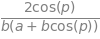

In [29]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)

In [30]:
# tenseur d'Einstein
E = Ricci - gd*Rscal/2
E = simplify(E)
E

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [31]:
def dcov(A, coords, pos):
    rank = len(pos)
    D1 = derive_by_array(A, coords)
    for i in range(rank):
        perm = list(range(rank+1))
        perm[i+1] = 0
        perm[0] = 1
        for j in range(1, i+1):
            perm[j] += 1
        if pos[i] == 0:
            print('indice ', i, ' est covariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (0, i+3))
            D1 -= permutedims(B, perm)
        else:
            print('indice ', i, ' est contravariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (1, i+3))
            D1 += permutedims(B, perm)
    return D1


In [32]:
simplify(dcov(gd, coords, (0,0)))

indice  0  est covariant, perm =  (1, 0, 2)
indice  1  est covariant, perm =  (1, 2, 0)


⎡⎡0  0⎤  ⎡0  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  0⎦  ⎣0  0⎦⎦

In [33]:
# identité de Bianchi

B = dcov(Rcov, coords, (0,0,0,0))
permutedims(B, (1,2,3,4,0))+permutedims(B, (1,2,0,3,4))+permutedims(B, (1,2,4,0,3))

indice  0  est covariant, perm =  (1, 0, 2, 3, 4)
indice  1  est covariant, perm =  (1, 2, 0, 3, 4)
indice  2  est covariant, perm =  (1, 2, 3, 0, 4)
indice  3  est covariant, perm =  (1, 2, 3, 4, 0)


⎡⎡⎡0  0⎤  ⎡0  0⎤⎤  ⎡⎡0  0⎤  ⎡0  0⎤⎤⎤
⎢⎢⎢    ⎥  ⎢    ⎥⎥  ⎢⎢    ⎥  ⎢    ⎥⎥⎥
⎢⎢⎣0  0⎦  ⎣0  0⎦⎥  ⎢⎣0  0⎦  ⎣0  0⎦⎥⎥
⎢⎢              ⎥  ⎢              ⎥⎥
⎢⎢⎡0  0⎤  ⎡0  0⎤⎥  ⎢⎡0  0⎤  ⎡0  0⎤⎥⎥
⎢⎢⎢    ⎥  ⎢    ⎥⎥  ⎢⎢    ⎥  ⎢    ⎥⎥⎥
⎣⎣⎣0  0⎦  ⎣0  0⎦⎦  ⎣⎣0  0⎦  ⎣0  0⎦⎦⎦